In [1]:
# test loading qpy circuits

# Yikai Mao

In [2]:
# reproducibility
%env PYTHONHASHSEED=0

# Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer, qpy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit import Parameter
from qiskit.circuit.library import Diagonal, QFT, GroverOperator, ZGate, EfficientSU2, ZZFeatureMap, RealAmplitudes
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.extensions import Initialize

# other libraries
import time
import math
from random import sample, choice
import numpy as np
from numpy import pi
import networkx as nx
from tqdm import tqdm # use: tqdm(iterable)
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
from sklearn.metrics import r2_score

print('*'*44)
print("available simulators:")
display(Aer.backends())
print('*'*44)

env: PYTHONHASHSEED=0
********************************************
available simulators:


[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

********************************************


In [3]:
# utility functions

def run_ideal_simulation(circuit, shots, optimization_level, seed, show_plot, show_counts):
    # assume perfect device with no noise
    # circuit = circuit to simulate, not transpiled
    # shots = how many shots to run
    # optimization_level = passed to the transpiler, min = 0, max = 3
    # seed = random seed for simultaion, can be None
    # show_counts = T/F, plot result or not

    simulator = Aer.get_backend('aer_simulator')
    temp_qc = transpile(circuit, simulator, optimization_level=optimization_level)
    job_temp = simulator.run(temp_qc, shots=shots, seed_simulator=seed)
    temp_results = job_temp.result()
    
    # build simulation result dict
    raw_counts = temp_results.get_counts()
    # print("raw counts:\n", raw_counts)
    num_clbits = circuit.num_clbits
    ideal_result_dict = {}

    # sorting the raw counts, add state zero
    for i in range(pow(2, num_clbits)):
        bin_str = format(i, str('0>' + str(num_clbits) + 'b'))
        if bin_str not in raw_counts:
            ideal_result_dict[bin_str] = 0
        else:
            ideal_result_dict[bin_str] = raw_counts[bin_str]

    if show_plot:
        plot = plot_histogram(raw_counts, title='ideal simulation')
        display(plot)
            
    if show_counts:
        print('sorted counts:')
        print(ideal_result_dict)
    
    return ideal_result_dict, raw_counts

def decomposer(circ, level=1):
    # decompose the circuit to see the basis gates
    # level = how many times to decompose
    
    decomposed_circ = circ
    
    for i in range(level):
        decomposed_circ = decomposed_circ.decompose()
        
    return decomposed_circ

def random_bin_str(width, zero=False):
    # return random binary string based on width
    # zero = T/F, T = include 0, F = do not return 0
    # width cannot be 0
    
    if width == 0:
        return None
    
    b = np.random.randint(2, size=width)
    b_str = ''.join(map(str, b.tolist()))
    
    if zero==True:
        return b_str
    
    else:
        while '1' not in b_str:
            b = np.random.randint(2, size=width)
            b_str = ''.join(map(str, b.tolist()))
        
        return b_str

In [30]:
# some circuits are too large for github, so zipped here
# !tar chvfz dataset.tar.gz /opt/notebooks/QC_gen/dataset

tar: Removing leading `/' from member names
/opt/notebooks/QC_gen/dataset/
/opt/notebooks/QC_gen/dataset/03_grover_circuits.qpy
tar: Removing leading `/' from hard link targets
/opt/notebooks/QC_gen/dataset/09_quantum_key_distribution_circuits.qpy
/opt/notebooks/QC_gen/dataset/01_bernstein_vazirani_circuits.qpy
/opt/notebooks/QC_gen/dataset/test.ipynb
/opt/notebooks/QC_gen/dataset/08_shor_circuits.qpy
/opt/notebooks/QC_gen/dataset/06_qft_circuits.qpy
/opt/notebooks/QC_gen/dataset/07_qpe_circuits.qpy
/opt/notebooks/QC_gen/dataset/11_quantum_teleportation_circuits.qpy
/opt/notebooks/QC_gen/dataset/.ipynb_checkpoints/
/opt/notebooks/QC_gen/dataset/.ipynb_checkpoints/test-checkpoint.ipynb
/opt/notebooks/QC_gen/dataset/14_vqc_circuits.qpy
/opt/notebooks/QC_gen/dataset/04_quantum_counting_circuits.qpy
/opt/notebooks/QC_gen/dataset/00_deutsch_jozsa_circuits.qpy
/opt/notebooks/QC_gen/dataset/05_quantum_walk_circuits.qpy
/opt/notebooks/QC_gen/dataset/10_superdense_coding_circuits.qpy
/opt/noteb

In [31]:
with open('00_deutsch_jozsa_circuits.qpy', 'rb') as fd:
    dj_circuits = qpy.load(fd) # qpy.load() always return a list

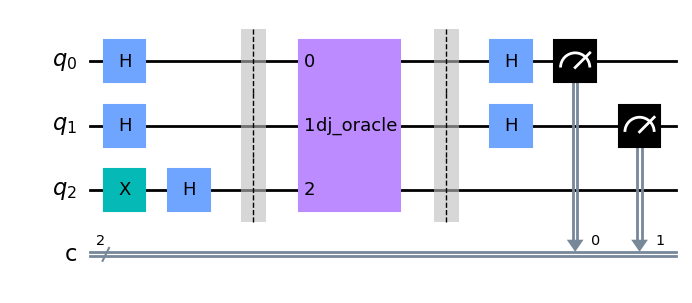

In [32]:
dj_circuits[0].draw()

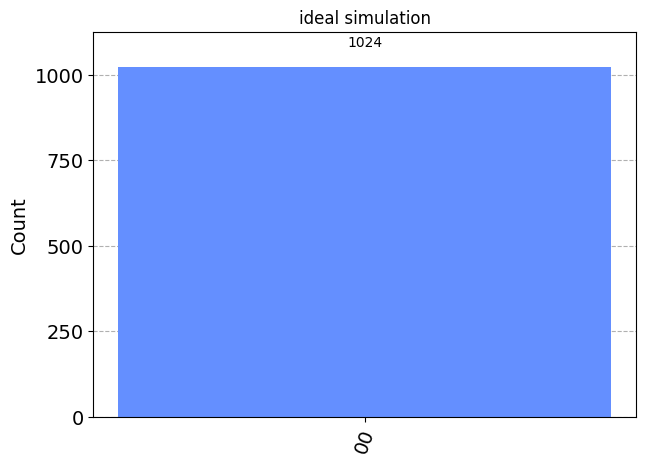

CPU times: user 115 ms, sys: 52.3 ms, total: 168 ms
Wall time: 96.4 ms


In [33]:
%%time

qc = dj_circuits[0]
shots = 1024
optimization_level = 0
seed = None
show_plot = True
show_counts = False

sorted_counts, raw_counts = run_ideal_simulation(qc, shots, optimization_level, seed, show_plot, show_counts)

In [35]:
!git commit -m "add dataset and qpy example"

[main 6a418f2] add dataset and qpy example
 25 files changed, 3435 insertions(+), 3 deletions(-)
 create mode 100644 communication/communication_gen.ipynb
 create mode 100644 dataset/00_deutsch_jozsa_circuits.qpy
 create mode 100644 dataset/dataset.tar.gz
 create mode 100644 dataset/test.ipynb
 create mode 100644 images/00_deutsch_jozsa.png
 create mode 100644 images/01_bernstein_vazirani.png
 create mode 100644 images/02_simon.png
 create mode 100644 images/03_grover.png
 create mode 100644 images/04_quantum_counting.png
 create mode 100644 images/05_quantum_walk.png
 create mode 100644 images/06_qft.png
 create mode 100644 images/07_qpe.png
 create mode 100644 images/08_shor.png
 create mode 100644 images/09_quantum_key_distribution.png
 create mode 100644 images/10_superdense_coding.png
 create mode 100644 images/11_quantum_teleportation.png
 create mode 100644 images/12_qaoa.png
 create mode 100644 images/13_vqe.png
 create mode 100644 images/14_vqc.png
 create mode 100644 images/1